Importing required libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import gym

Importing discretization code from other notebook

In [3]:
%run discretization.ipynb


Action selection step


In [4]:

def action_selection(Q, state, epsilon, n_actions):

    #Exploration
    if np.random.random() < epsilon:
        return np.random.choice(n_actions)
    
    #Exploitation
    else:
        return np.argmax(Q[state])

In [5]:
# Q-Learning algorithm with output monitoring
def q_learning(env, num_episodes, alpha, gamma, epsilon, n_bins, n_actions):
    Q = np.zeros([n_bins, n_bins, n_bins, n_bins, n_actions])
    episode_reward = []

    for episode in range(num_episodes):

        # state
        state, _ = env.reset()
        state = discretize_state(state)
        done = False
        total_reward = 0
        
        while not done:
            action = action_selection(Q, state, epsilon, n_actions)
            next_state, reward, done, truncated, _ = env.step(action)
            next_state = discretize_state(next_state)
            
            # Q updating
            Q[state][action] += alpha * (reward + gamma * np.max(Q[next_state]) - Q[state][action])
            
            state = next_state
            total_reward += reward

        episode_reward.append(total_reward)

        if episode % 100 == 0:  
            print(f"Episode: {episode}, Total Reward: {total_reward}")

    return Q, episode_reward

Environment

In [6]:
env = gym.make('CartPole-v0')

c:\Users\Asus\anaconda3\envs\rl\lib\site-packages\gym\envs\registration.py:555: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(


Hyperparameter

In [7]:
episodes = 2000

alpha = 0.1

gamma = 0.99

epsilon = 0.2

n_actions = env.action_space.n  

Final training

In [8]:
Q_q_learning, reward = q_learning(env, episodes, alpha, gamma, epsilon, n_bins, n_actions)


Episode: 0, Total Reward: 12.0
Episode: 100, Total Reward: 14.0
Episode: 200, Total Reward: 14.0
Episode: 300, Total Reward: 24.0
Episode: 400, Total Reward: 28.0
Episode: 500, Total Reward: 21.0
Episode: 600, Total Reward: 26.0
Episode: 700, Total Reward: 21.0
Episode: 800, Total Reward: 16.0
Episode: 900, Total Reward: 22.0
Episode: 1000, Total Reward: 22.0
Episode: 1100, Total Reward: 35.0
Episode: 1200, Total Reward: 14.0
Episode: 1300, Total Reward: 14.0
Episode: 1400, Total Reward: 10.0
Episode: 1500, Total Reward: 22.0
Episode: 1600, Total Reward: 22.0
Episode: 1700, Total Reward: 26.0
Episode: 1800, Total Reward: 24.0
Episode: 1900, Total Reward: 24.0


Final plot: Avg reward vs Episode

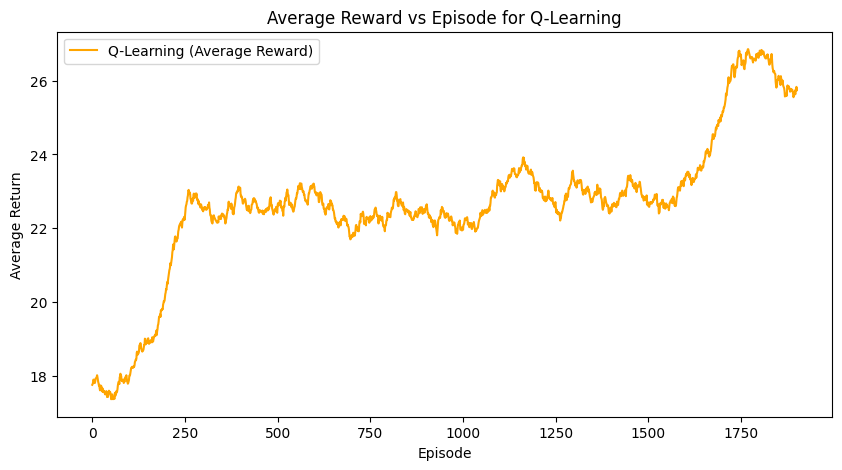

In [10]:

def avg_reward_plot(rewards_q_learning, w_size=100):
    
    avg_return_q_learning = np.convolve(rewards_q_learning, np.ones(w_size)/w_size, mode='valid')

    plt.figure(figsize=(10, 5))
    plt.plot(avg_return_q_learning, label='Q-Learning (Average Reward)', color='orange')
    plt.xlabel('Episode')
    plt.ylabel('Average Return')
    plt.title('Average Reward vs Episode for Q-Learning')
    plt.legend()
    plt.show()

# Call the functions to plot the average return

avg_reward_plot(reward)
